In [ ]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
%pip install bioinfokit
from bioinfokit.analys import stat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.7/87.7 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.3-py3-none-any.whl size=59056 sha256=e8200c137444b28d5e99575fa4db5ac884830c27ad04481e3ce1eeabfd203899
  Stored in directory: /root/.cache/pip/wheels/ac/67/a7/4e0b4172d5415933127e819d7d7080ae08a6220949ad2f6de5
Successfully built bioinfokit


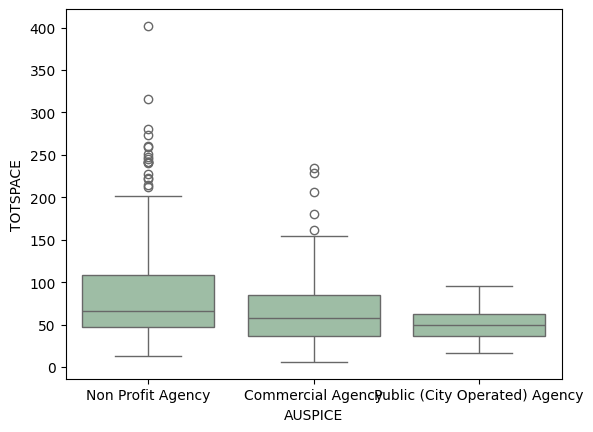

In [ ]:
# Uploaded Excel file
df_centres = pd.read_excel('INF2178_A2_data.xlsx', sheet_name='ChildCareCentres')

# Display the DataFrame
df_centres

# Generate a boxplot to see the data distribution by AUSPICE.
ax = sns.boxplot(x='AUSPICE', y='TOTSPACE', data=df_centres, color='#99c2a2')
plt.show()

In [ ]:
# One-Way ANOVAS
# Adjusting the model to our dataset
model = ols('TOTSPACE ~ C(AUSPICE)', data=df_centres).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                  sum_sq      df          F        PR(>F)
C(AUSPICE)  9.611211e+04     2.0  21.843051  5.057716e-10
Residual    2.332065e+06  1060.0        NaN           NaN


In [ ]:
#Post-hoc test using Tukey's HSD
res = stat()
res.tukey_hsd(df=df_centres, res_var='TOTSPACE', xfac_var='AUSPICE', anova_model='TOTSPACE ~ C(AUSPICE)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Non Profit Agency,Commercial Agency,16.806538,3.993722,29.619353,4.356853,0.006071
1,Non Profit Agency,Public (City Operated) Agency,36.177966,8.673910,63.682022,4.369046,0.005901
2,Commercial Agency,Public (City Operated) Agency,19.371429,-10.141900,48.884757,2.180132,0.272554


                  sum_sq      df          F        PR(>F)
C(AUSPICE)  9.611211e+04     2.0  21.843051  5.057716e-10
Residual    2.332065e+06  1060.0        NaN           NaN


/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

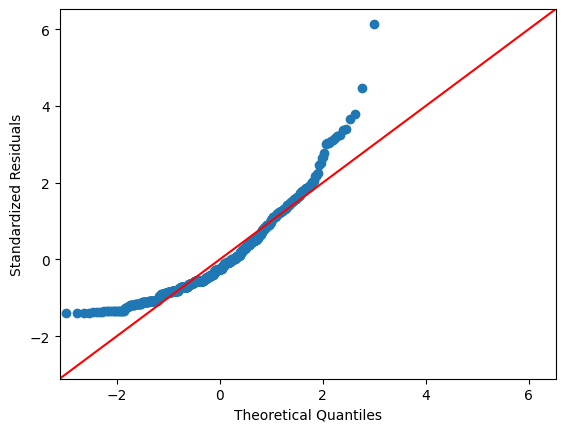

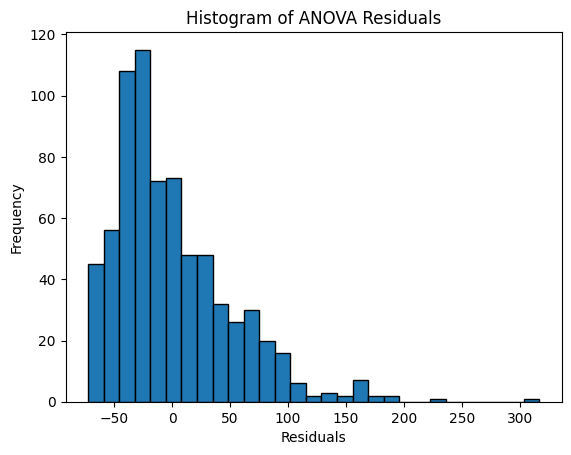

0.901775598526001 1.4964898448030214e-25


In [ ]:
# Extract residuals
residuals = model.resid
residuals
res.anova_std_residuals

# assumption 1: res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# Generate histogram to inspect distribution of residuals
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.title("Histogram of ANOVA Residuals")
plt.show()

#assumption 1: residuals are normally distributed: Shapiro Wilk test
w, pvalue = stats.shapiro(model.resid)
print(w,pvalue)

In [ ]:
#assumption 2: variances are homogenous: Levene's test when the sample is not normally distributed
res.levene(df=df_centres, res_var='TOTSPACE', xfac_var='AUSPICE')
res.levene_summary

,Parameter,Value
0,Test statistics (W),9.1994
1,Degrees of freedom (Df),2.0000
2,p value,0.0001


,df,sum_sq,mean_sq,F,PR(>F)
C(AUSPICE),2.0,8.567996e+03,4283.998054,2.057586,1.282730e-01
C(subsidy),1.0,8.352744e+04,83527.441787,40.117876,3.529094e-10
C(AUSPICE):C(subsidy),2.0,5.603445e+04,28017.227037,13.456555,1.694282e-06
Residual,1058.0,2.202809e+06,2082.050461,NaN,NaN


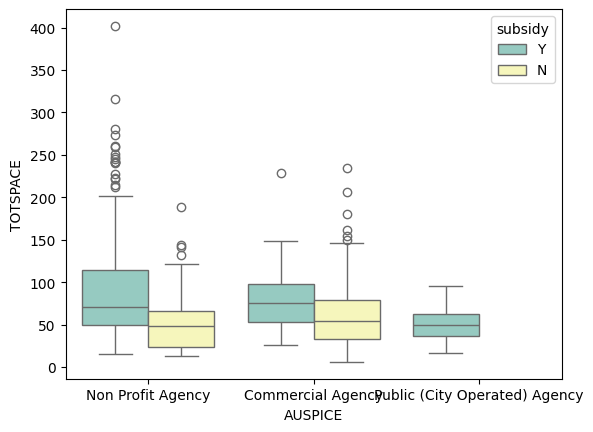

In [ ]:
sns.boxplot(x="AUSPICE", y="TOTSPACE", hue="subsidy",data=df_centres, palette="Set3")

#Two-Way ANOVAS
res = stat()
res.anova_stat(df=df_centres, res_var='TOTSPACE', anova_model='TOTSPACE ~ C(AUSPICE) + C(subsidy) + C(AUSPICE):C(subsidy)')
res.anova_summary

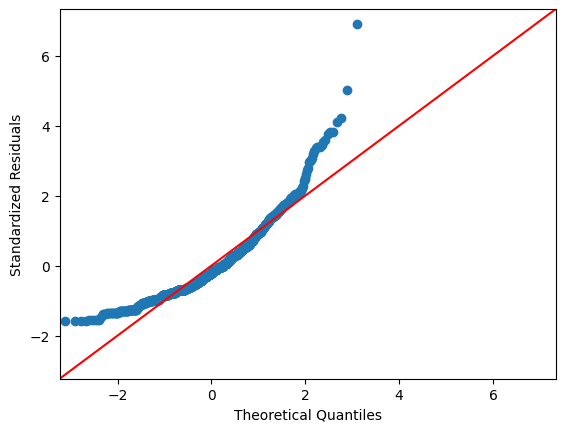

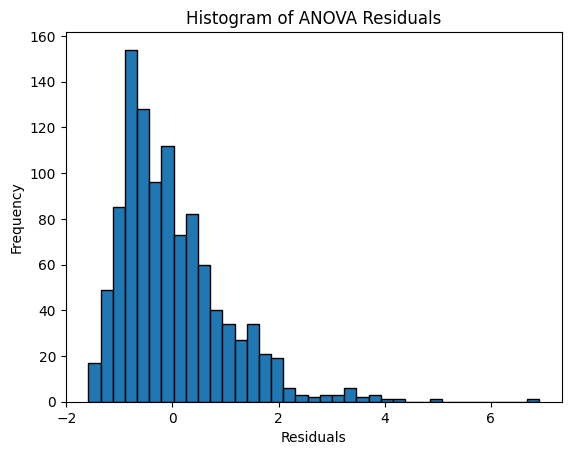

0.9018619656562805 1.5311055543621852e-25


In [ ]:
model_2 = ols('TOTSPACE ~ C(AUSPICE) + C(subsidy) + C(AUSPICE):C(subsidy)', data=df_centres).fit()

# Extract residuals
residuals_2 = model_2.resid

# Standardize the residuals
standardized_residuals_2 = residuals_2 / residuals_2.std()

# assumption 1: res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(standardized_residuals_2, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# Generate histogram to inspect distribution of residuals
plt.hist(standardized_residuals_2, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.title("Histogram of ANOVA Residuals")
plt.show()

#assumption 1: residuals are normally distributed: Shapiro Wilk test
w, pvalue = stats.shapiro(residuals_2)
print(w,pvalue)


In [ ]:
#assumption 2: variances are homogenous: Levene's test when the sample is not normally distributed
# Check for and handle NaN values
df_centres = df_centres.dropna(subset=['TOTSPACE'])

# Ensure TOTSPACE is the correct data type
df_centres['TOTSPACE'] = pd.to_numeric(df_centres['TOTSPACE'], errors='coerce')

# Perform Levene's test
statistic, p_value = stats.levene(
    *[
        group['TOTSPACE'].values
        for name, group in df_centres.groupby(['AUSPICE', 'subsidy'])
    ]
)

print('Levene’s test statistic:', statistic)
print('Levene’s test p-value:', p_value)

Levene’s test statistic: 12.984714966192847
Levene’s test p-value: 2.51515889994611e-10


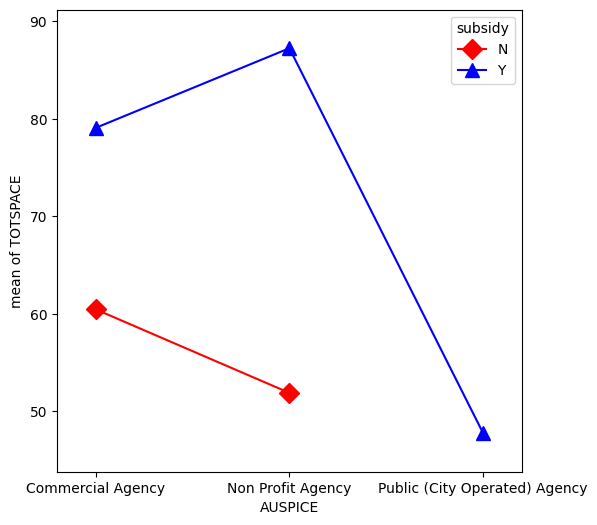

In [ ]:
#Create Interaction Plot
import matplotlib.pyplot as plt
from statsmodels.graphics.factorplots import interaction_plot

fig, ax = plt.subplots(figsize=(6,6))

fig = interaction_plot(x=df_centres['AUSPICE'], trace=df_centres['subsidy'], response=df_centres['TOTSPACE'],
                       colors=["red","blue"], markers=["D","^"], ms=10, ax=ax)

In [ ]:
#Post-hoc test using Tukey's HSD
res.tukey_hsd(df=df_centres, res_var='TOTSPACE',xfac_var='AUSPICE',anova_model='TOTSPACE ~ C(AUSPICE) + C(subsidy) + C(AUSPICE):C(subsidy)')
res.tukey_summary

res.tukey_hsd(df=df_centres,res_var='TOTSPACE',xfac_var='subsidy',anova_model='TOTSPACE ~ C(AUSPICE) + C(subsidy) + C(AUSPICE):C(subsidy)')
res.tukey_summary

res.tukey_hsd(df=df_centres,res_var='TOTSPACE',xfac_var=['AUSPICE','subsidy'], anova_model='TOTSPACE ~ C(AUSPICE) + C(subsidy) + C(AUSPICE):C(subsidy)')
res.tukey_summary.head()

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,"(Non Profit Agency, Y)","(Non Profit Agency, N)",44.986164,25.584897,64.387430,9.370204,0.001000
1,"(Non Profit Agency, Y)","(Commercial Agency, Y)",0.145138,-28.465689,28.755965,0.020500,0.900000
2,"(Non Profit Agency, Y)","(Commercial Agency, N)",28.370552,11.192465,45.548638,6.674107,0.001000
3,"(Non Profit Agency, Y)","(Public (City Operated) Agency, Y)",40.752830,8.307960,73.197700,5.075887,0.004757
4,"(Non Profit Agency, Y)","(Public (City Operated) Agency, N)",0.000000,-inf,inf,0.000000,0.900000
